# Playing Darts and Estimating Pi

One can estimate the value $\pi \approx 3.14159$ by throwing darts at a dart board.  The dart board consists of 
a circle of radius 1 within a square of side length 1. 

!['image of circle within a square'](circle_square_small.png)

Because each throw falls randomly within the square, one can quickly realize that the probability of a dart 
landing within the circle is given by the ratio of the circle's area to the square's area:

\begin{equation}
Prob_{circle} = \frac{Area_{circle}}{Area_{square}} = \frac{\pi r^2}{(2r)^2}
\end{equation}

Furthermore, $Prob_{circle}$ as being approximated by the fraction of darts thrown that land in the circle. Thus: 

\begin{equation}
Prob_{circle} \approx \frac{N_{circle}}{N_{total}} = \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4}
\end{equation}

where $N_{total}$ is the total number of darts thrown, and $N_{circle}$ is the number of darts that land 
within the circle. Thus simply by keeping tally of where the darts land, one can estimate the value of $\pi$!

## Python without Vectorization

Write code that simulates the dart throwing and tallying process, and keep a running estimate of $\pi$ 
as "darts are being thrown". For simplicity, one can assume that the board is centered at $(0, 0)$, and 
that $r = 1$ (the radius of the circle). 

Use `numpy.random.rand` to randomly generate the positions on the board where darts land. 

Do this for $N = 10,000$ darts in total. For each dart thrown determine whether or not it landed within the circle, 
and update the estimate of $\pi$ according to the formula: $N_{circle} / N_{total} \approx \pi / 4$

Keep in mind that each dart can land in $(x \in [-1, 1], y \in [-1, 1])$ and that a dart that 
lands at $(x, y)$ falls within the circle if 

\begin{equation}
    \sqrt{x^2 + y^2} < 1
\end{equation}

Using Python's explicit for-loops to clearly see the solution. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

c:\users\anamini\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


## Solution (Unvectorized)

Generate the $(x, y)$ coordinates for $N = 10,000$ darts.

Using `numpy.random.rand(N, 2)`, we can generate a 2D array with $N$ rows - each row contains the $(x, y)$ 
coordinate for a single dart. 

We want the $x$ and $y$ coordinate of each dart to fall within $[-1, 1]$, respectively.

`numpy.random.rand` generates numbers on the interval $[0, 1)$. We can multiply the generated numbers by two 
and then subtract one to instead generate numbers on the interval $[-1, 1)$.

Loop over the dart positions, determine if whether a given dart fell within the circle, and update 
$N_{circle}$ accordingly.

In [2]:
def unvectorized(number_of_darts):
    dart_positions = 2 * np.random.rand(number_of_darts, 2) - 1
    number_darts_within_circle = [0] 
    
    for x,y in dart_positions:   
        if np.sqrt(x**2 + y**2) < 1:
            number_darts_within_circle.append(number_darts_within_circle[-1] + 1)
        else:
            number_darts_within_circle.append(number_darts_within_circle[-1])
    
    running_estimate = []
    for number_total, number_circle in enumerate(number_darts_within_circle[1:]):
        running_estimate.append(4 * number_circle / (number_total + 1))

    return running_estimate


Running Estimate (first 10)
[0.0, 2.0, 1.3333333333333333, 2.0, 2.4, 2.6666666666666665, 2.857142857142857, 3.0, 3.111111111111111, 2.8]

Running Estimate (last 10)
[3.130817735962366, 3.130904723779023, 3.13099169418593, 3.131078647188313, 3.131165582791396, 3.1308523409363747, 3.1305391617485245, 3.130226045209042, 3.1303130313031304, 3.1304]

Pi is   3.130400


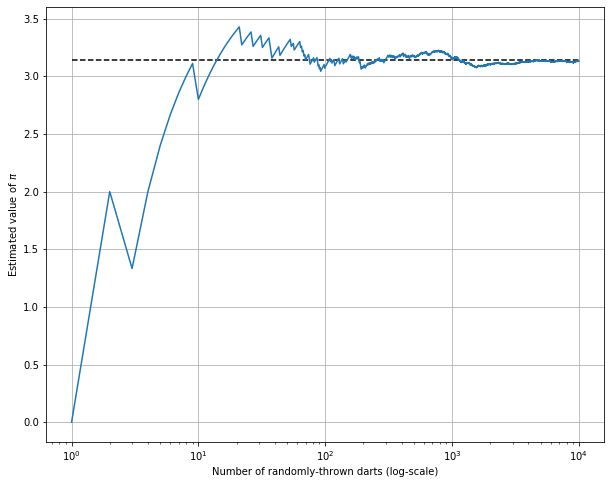

In [3]:
def plot_solution(number_thrown, running_estimate):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8)
    
    ax.plot(number_thrown, running_estimate)
    ax.hlines(y=np.pi, xmin=1, xmax=number_thrown[-1]+1, linestyles="--")  # horizontal line at true value of pi
    ax.set_xscale("log")
    
    ax.set_ylabel(r"Estimated value of $\pi$")
    ax.set_xlabel("Number of randomly-thrown darts (log-scale)")
    ax.grid(True)
    
    plt.show()
    

number_of_darts = 10000
running_estimate = unvectorized(number_of_darts)

print('\nRunning Estimate (first 10)')
print(running_estimate[:10])
print('\nRunning Estimate (last 10)')
print(running_estimate[-10:])
print(f'\nPi is {running_estimate[-1]:10.6f}')

plot_solution(range(1, number_of_darts+1), running_estimate)

## End of Solution (Unvectorizezd)

## Solution (Vectorized)

To start, one must generate the $(x, y)$ coordinates for our $N = 10,000$ darts. 
Again, using `numpy.random.rand(N, 2)`, one can generate a 2D array with $N$ rows - each row contains the 
$(x, y)$ coordinate for a single dart. 

Again, check that $x$ and $y$ coordinate of each falls within $[-1, 1]$, respectively. 
`numpy.random.rand` generates numbers on the interval $[0, 1)$. We can multiply the generated numbers by two 
and then subtract one to instead generate numbers on the interval $[-1, 1)$.

In [4]:
def vectorized(number_of_darts):
    dart_positions = 2 * np.random.rand(number_of_darts, 2) - 1  
    dist_from_origin = np.sqrt((dart_positions**2).sum(axis=1))  
    is_in_circle = dist_from_origin < 1  
    num_in_circle = np.cumsum(is_in_circle)
    num_thrown = np.arange(1, number_of_darts+1)
    running_estimate = 4 * num_in_circle / num_thrown
    return running_estimate


Running Estimate (first 10)
[0.         0.         1.33333333 2.         2.4        2.66666667
 2.85714286 3.         3.11111111 2.8       ]

Running Estimate (last 10)
[3.12441197 3.1244996  3.12458721 3.1246748  3.12436218 3.12404962
 3.12413724 3.12422484 3.12431243 3.124     ]

Pi is   3.124000


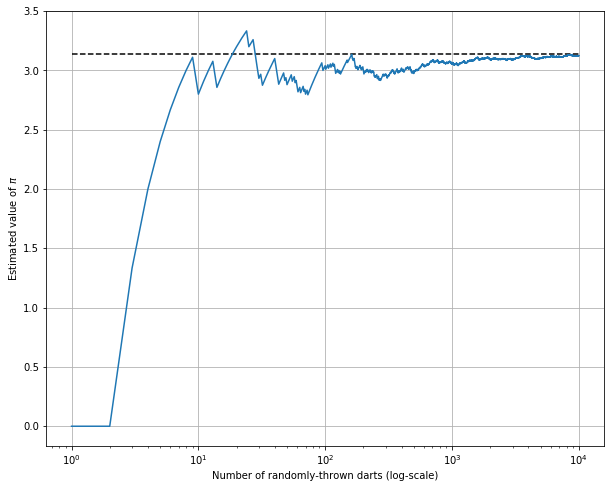

In [5]:
number_of_darts = 10000
running_estimate = vectorized(number_of_darts)

print('\nRunning Estimate (first 10)')
print(running_estimate[:10])
print('\nRunning Estimate (last 10)')
print(running_estimate[-10:])
print(f'\nPi is {running_estimate[-1]:10.6f}')

plot_solution(range(1, number_of_darts+1), running_estimate)

In [6]:
## End of Solution (Vectorizezd)

# Performance (Timing Code)

In [7]:
number_of_darts = 10000
print('Unvectorized')
%timeit running_estimate = unvectorized(number_of_darts)
print('Vectorized')
%timeit running_estimate = vectorized(number_of_darts)

Unvectorized
30.8 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Vectorized
400 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Simulation

One can see that the shape and estimated value of $\pi$ changes each time during an execution.  This is expected since
this is the dart throws are random.  Note that the plots show that the curves are consistently closing in on the 
true value of $\pi$ as more and more darts are thrown.

Let's try to study some of the statistics of this process. 

Let's simulate the process of throwing $N = 10,000$ with $M = 100$ independent trials. 

For each dart thrown, compute the average estimated value of $\pi$ across the $M$ trials along with the 
standard deviation across them. Plot this mean curve along with the `mean + std-dev` upper-bound and `mean - std-dev` 
lower-bound curves. 

## Solution

Rather than generating $(N, 2)$ dart positions, we will generate $(M, N, 2)$ positions. 
That is, axis-0 corresponds to each independent trial of $N=10,000$ throws, 
axis-1 corresponds to each individual dart throw, and axis-2 corresponds to the $(x, y)$ coordinate 
for where a dart landed. 

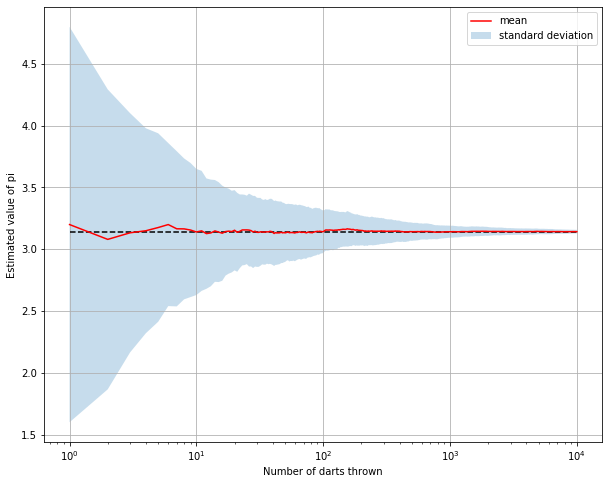

In [9]:
def trials_with_vectorization(number_of_trials, number_of_darts):

    dart_positions = np.random.rand(number_of_trials, number_of_darts, 2) * 2 - 1               # shape-(M, N, 2) array of positions
    dist_from_origin = np.sqrt((dart_positions**2).sum(axis=2))    # shape-(M, N) array of distances
    is_in_circle = dist_from_origin <= 1                           # shape-(M, N) boolean array

    number_thrown = np.arange(1, number_of_darts+1)  # 1, 2, ..., N, shape=(N,)
    num_in_circle = np.cumsum(is_in_circle, axis=1)  # shape-(M, N)

    running_estimate = 4 * num_in_circle / number_thrown
    return number_thrown, running_estimate

def plot_with_trials(number_thrown, mean_in_circle, stdev_in_circle):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8)
    
    ax.plot(number_thrown, mean_in_circle, color='red', label="mean");
    ax.fill_between(number_thrown, y1=mean_in_circle-stdev_in_circle, y2=mean_in_circle+stdev_in_circle, 
                    alpha=0.25, label="standard deviation")
    ax.hlines(y=np.pi, xmin=1, xmax=number_thrown[-1]+1, linestyles="--")
    
    ax.set_xscale("log")
    ax.grid(True)
    ax.set_ylabel("Estimated value of pi")
    ax.set_xlabel("Number of darts thrown")
    ax.legend()
    
    plt.show()

number_of_trials = 100
number_of_darts = 10000
num_thrown, running_estimate = trials_with_vectorization(number_of_trials, number_of_darts)    
mean_in_circle = running_estimate.mean(axis=0)
std_in_circle = running_estimate.std(axis=0)
plot_with_trials(num_thrown, mean_in_circle, std_in_circle)
